In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns

# Read Data

In [2]:
# location of file to read
path = ''
file_name = 'variant_surveillance.tsv'

# read in only a sample of the data
n = sum(1 for line in open(path+file_name)) - 1 #number of records in file (excludes header)
s = 10000 #desired sample size
skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list

# list of column names to read in
cols = ['Accession ID', 'Pango lineage', 'Collection date', 'Location', 'Variant', 'Host']

# read in file
df = pd.read_csv(path + file_name, sep='\t', low_memory=False, usecols=cols)#, skiprows=skip

In [3]:
# check results
#df.head()
#df.shape

# Clean Data

## Variant

In [4]:
# create simplified Variant attribute named variant_mapped
df['variant_mapped'] = df['Variant']

# regex to extract variant information
regex_variant = '(^\w{3} \w+ )'
df['variant_mapped'] = df['variant_mapped'].str.extract(regex_variant)

# remove trailing white space character from regex
df['variant_mapped'] = df['variant_mapped'].str.strip()

# remove first four characters from variant_mapped attribute
df['variant_mapped'] = df['variant_mapped'].str[4:]

# replace NaN with unknown
df['variant_mapped'] = df['variant_mapped'].fillna('Unknown')

In [5]:
# check results
print(df['Variant'].value_counts())
print()
print(df['variant_mapped'].value_counts())

VOC Alpha 202012/01 GRY (B.1.1.7+Q.x) first detected in the UK                      1068258
VOC Delta G/478K.V1 (B.1.617.2+AY.x) first detected in India                         693986
VOC Gamma GR/501Y.V3 (P.1+P.1.x) first detected in Brazil/Japan                       79555
VOC Beta GH/501Y.V2 (B.1.351+B.1.351.2+B.1.351.3) first detected in South Africa      34760
VOI Iota GH/253G.V1 (B.1.526) first detected in USA/New York                          27523
VOI Eta G/484K.V3 (B.1.525) first detected in UK/Nigeria                               7945
VOI Kappa G/452R.V3 (B.1.617.1) first detected in India                                6381
VOI Lambda GR/452Q.V1 (C.37) first detected in Peru                                    4990
VOI Zeta GR/484K.V2 (P.2) first detected in Brazil                                     4922
Name: Variant, dtype: int64

Unknown    1117816
Alpha      1068258
Delta       693986
Gamma        79555
Beta         34760
Iota         27523
Eta           7945
Kappa     

# Display Data

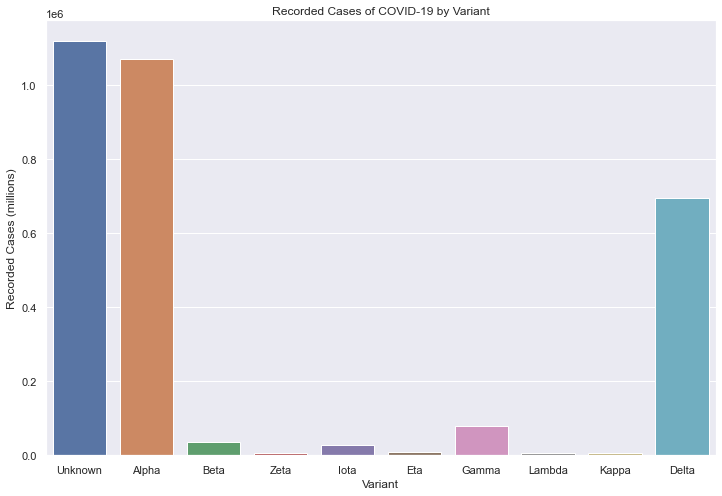

In [6]:
# adjust figure size
sns.set(rc={'figure.figsize':(12, 8)})

# create plot
ax1 = sns.countplot(x='variant_mapped', data=df)

# create labels
ax1.set_title('Recorded Cases of COVID-19 by Variant')
ax1.set_ylabel('Recorded Cases (millions)')
ax1.set_xlabel('Variant');

# Group Minor Variants as Other and Display

In [7]:
# create primary variant column
df['primary_variants'] = df['variant_mapped']

# dictionary of variants to map to other
other_variants = {'Beta':'Other', 'Zeta':'Other', 'Iota':'Other', 'Eta':'Other',\
                  'Gamma':'Other', 'Lambda':'Other', 'Kappa':'Other'}

# replace minor variants with other
df['primary_variants'] = df['primary_variants'].map(other_variants).fillna(df['primary_variants'])

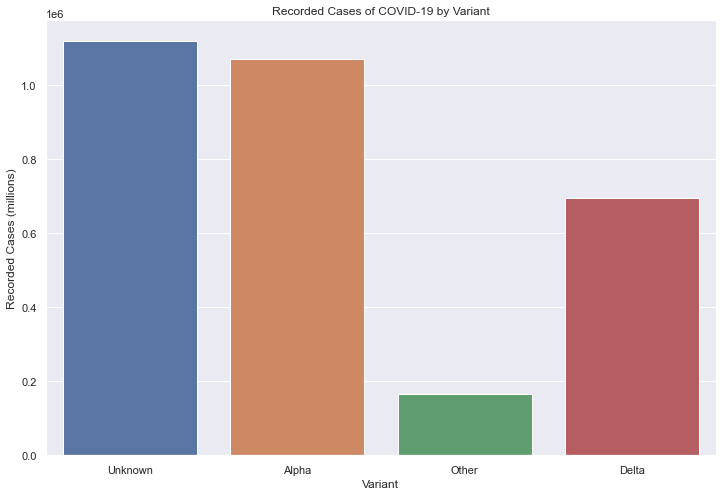

In [8]:
# create plot
ax2 = sns.countplot(x='primary_variants', data=df)

# create labels
ax2.set_title('Recorded Cases of COVID-19 by Variant')
ax2.set_ylabel('Recorded Cases (millions)')
ax2.set_xlabel('Variant');